In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
%matplotlib inline
import csv

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
mushroom = pd.read_csv("newMushroom10noise.csv", sep=',')
mushroom.head()

,Unnamed: 0,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,0,2,1,4,0,-3,4,3,1,0,...,2,-6,5,1,-5,-3,2,0,-2,p
1,1,0,0,1,1,1,0,0,1,0,...,0,0,1,0,2,0,1,1,1,e
2,2,1,0,2,1,2,0,0,1,1,...,0,0,1,0,2,0,1,1,2,e
3,3,0,1,2,1,0,0,0,0,1,...,0,0,1,0,2,0,0,0,0,p
4,4,0,0,3,0,3,0,1,1,0,...,0,0,1,0,2,1,1,2,1,e


In [4]:
appendicitis = pd.read_csv("appendicitis10noise.csv", sep=',')
appendicitis.head()

,Unnamed: 0,At1,At2,At3,At4,At5,At6,At7,Class
0,0,-0.95198,1.269008,-0.113165,0.308667,0.16636,1.581049,0.345802,1
1,1,0.45800,0.714000,0.468000,0.111000,0.10200,0.741000,0.436000,1
2,2,0.10200,0.518000,0.111000,0.056000,0.02200,0.506000,0.086000,1
3,3,0.18700,0.196000,0.105000,0.056000,0.02900,0.133000,0.085000,1
4,4,0.23600,0.804000,0.289000,0.111000,0.06600,0.756000,0.241000,1


In [5]:
Glass = pd.read_csv("glass10noise.csv")
Glass.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,0,-0.021125,12.278775,3.990204,2.041616,70.8887,0.193699,9.449939,0.64778,-0.272814,1
1,1,1.517610,13.890000,3.600000,1.360000,72.7300,0.480000,7.830000,0.00000,0.000000,1
2,2,1.516180,13.530000,3.550000,1.540000,72.9900,0.390000,7.780000,0.00000,0.000000,1
3,3,1.517660,13.210000,3.690000,1.290000,72.6100,0.570000,8.220000,0.00000,0.000000,1
4,4,1.517420,13.270000,3.620000,1.240000,73.0800,0.550000,8.070000,0.00000,0.000000,1


In [6]:
print(mushroom.shape)
print(mushroom.groupby('Class').size())

(5644, 24)
Class
e    3488
p    2156
dtype: int64


In [7]:
print(appendicitis.shape)
print(appendicitis.groupby('Class').size())

(106, 9)
Class
0    85
1    21
dtype: int64


In [8]:
print(Glass.shape)
print(Glass.groupby("Class").size())

(214, 11)
Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


In [9]:
data_mushroom = mushroom.iloc[:,1:23]
labels_mushroom = mushroom.iloc[:,23].astype(str)

In [10]:
data_appendicitis = appendicitis.iloc[:,1:8]
labels_appendicitis = appendicitis.iloc[:,8].astype(str)

In [11]:
data_Glass = Glass.iloc[:,1:10]
labels_Glass = Glass.iloc[:,10].astype(str)

In [12]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

## Decision Tree for Mushroom Dataset

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1719
           e       0.93      0.95      0.94      1103

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


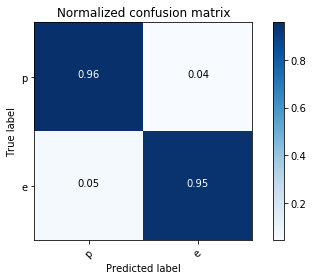

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1769
           e       0.94      0.95      0.94      1053

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.96      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


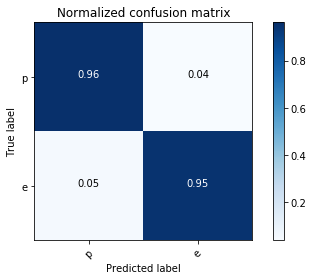

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1693
           e       0.94      0.95      0.94      1129

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.95      0.96      2822

accuracy:  0.9549964564138909


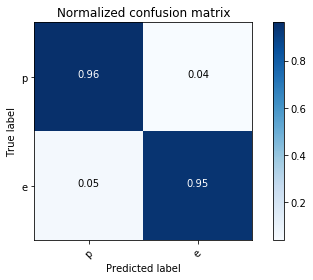

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1795
           e       0.93      0.95      0.94      1027

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9525159461374911


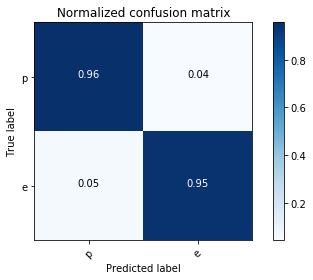

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1768
           e       0.94      0.95      0.94      1054

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


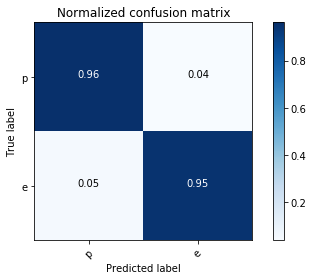

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1720
           e       0.95      0.94      0.95      1102

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


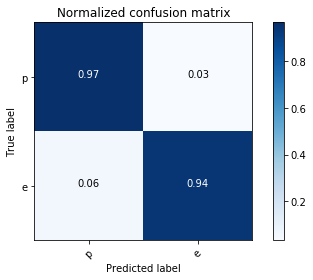

              precision    recall  f1-score   support

           p       0.96      0.95      0.96      1752
           e       0.92      0.94      0.93      1070

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.946491849751949


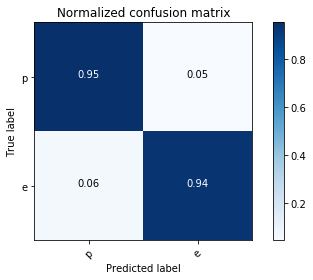

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1736
           e       0.95      0.94      0.95      1086

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9599574769666903


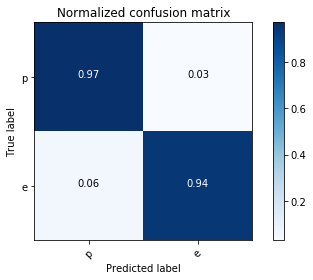

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1748
           e       0.94      0.94      0.94      1074

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9567682494684621


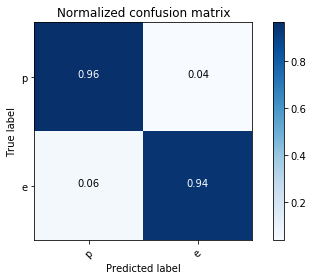

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1740
           e       0.95      0.95      0.95      1082

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9620836286321758


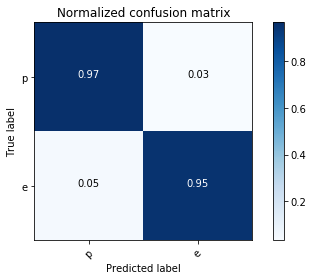

In [13]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data_mushroom.iloc[train_index], data_mushroom.iloc[test_index]
        y_train, y_test = labels_mushroom[train_index], labels_mushroom[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Appendicitis Dataset

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.29      0.20      0.24        10

   micro avg       0.75      0.75      0.75        53
   macro avg       0.56      0.54      0.54        53
weighted avg       0.72      0.75      0.74        53

accuracy:  0.7547169811320755


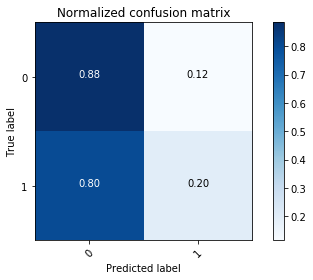

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.67      0.55      0.60        11

   micro avg       0.85      0.85      0.85        53
   macro avg       0.78      0.74      0.75        53
weighted avg       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


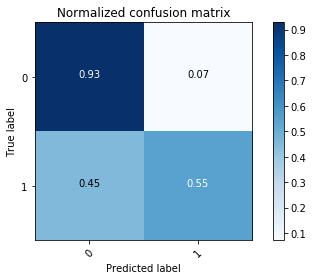

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.30      0.30      0.30        10

   micro avg       0.74      0.74      0.74        53
   macro avg       0.57      0.57      0.57        53
weighted avg       0.74      0.74      0.74        53

accuracy:  0.7358490566037735


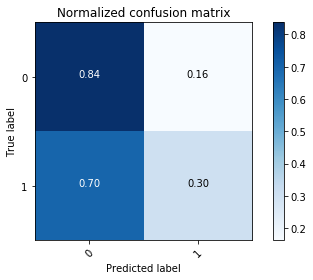

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.47      0.64      0.54        11

   micro avg       0.77      0.77      0.77        53
   macro avg       0.68      0.72      0.69        53
weighted avg       0.81      0.77      0.79        53

accuracy:  0.7735849056603774


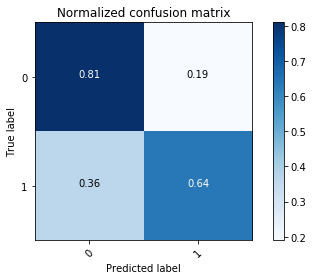

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.33      0.57      0.42         7

   micro avg       0.79      0.79      0.79        53
   macro avg       0.63      0.70      0.65        53
weighted avg       0.85      0.79      0.81        53

accuracy:  0.7924528301886793


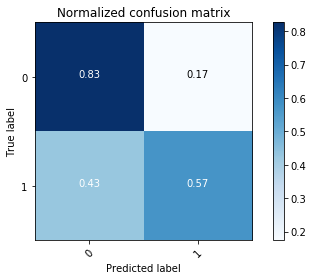

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        39
           1       0.50      0.29      0.36        14

   micro avg       0.74      0.74      0.74        53
   macro avg       0.64      0.59      0.60        53
weighted avg       0.70      0.74      0.71        53

accuracy:  0.7358490566037735


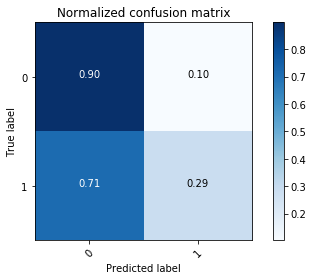

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.50      0.33      0.40        15

   micro avg       0.72      0.72      0.72        53
   macro avg       0.63      0.60      0.61        53
weighted avg       0.69      0.72      0.70        53

accuracy:  0.7169811320754716


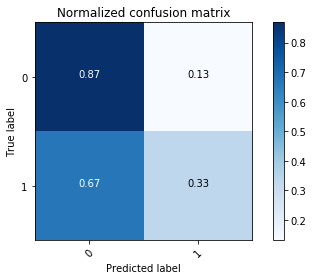

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        47
           1       0.23      0.50      0.32         6

   micro avg       0.75      0.75      0.75        53
   macro avg       0.58      0.64      0.58        53
weighted avg       0.85      0.75      0.79        53

accuracy:  0.7547169811320755


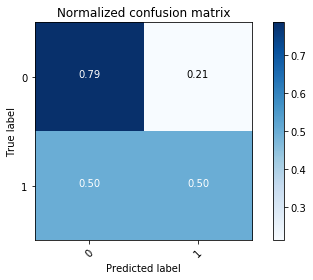

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.40      0.75      0.52         8

   micro avg       0.79      0.79      0.79        53
   macro avg       0.67      0.78      0.69        53
weighted avg       0.86      0.79      0.82        53

accuracy:  0.7924528301886793


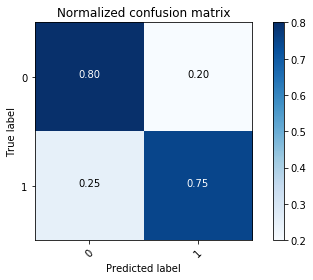

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        40
           1       0.56      0.38      0.45        13

   micro avg       0.77      0.77      0.77        53
   macro avg       0.69      0.64      0.66        53
weighted avg       0.75      0.77      0.76        53

accuracy:  0.7735849056603774


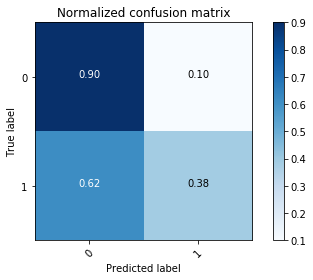

In [14]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data_appendicitis.iloc[train_index], data_appendicitis.iloc[test_index]
        y_train, y_test = labels_appendicitis[train_index], labels_appendicitis[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## Decision Tree for Glass Dataset

              precision    recall  f1-score   support

           5       0.59      0.68      0.63        34
           6       0.69      0.52      0.59        42
           7       0.33      0.50      0.40        10
           3       0.33      0.50      0.40         4
           2       1.00      0.40      0.57         5
           1       0.77      0.83      0.80        12

   micro avg       0.60      0.60      0.60       107
   macro avg       0.62      0.57      0.57       107
weighted avg       0.63      0.60      0.60       107

accuracy:  0.5981308411214953


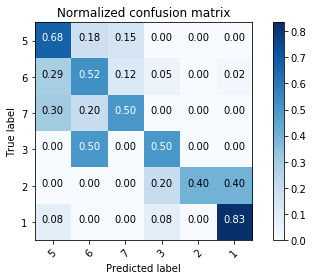

              precision    recall  f1-score   support

           5       0.77      0.56      0.65        36
           6       0.56      0.65      0.60        34
           7       0.33      0.43      0.38         7
           3       0.60      0.33      0.43         9
           2       0.17      0.25      0.20         4
           1       0.55      0.71      0.62        17

   micro avg       0.57      0.57      0.57       107
   macro avg       0.50      0.49      0.48       107
weighted avg       0.60      0.57      0.57       107

accuracy:  0.5700934579439252


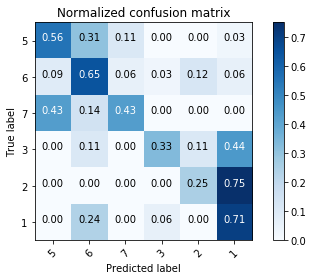

              precision    recall  f1-score   support

           5       0.70      0.70      0.70        40
           6       0.67      0.61      0.64        36
           7       0.11      0.14      0.12         7
           3       0.40      0.50      0.44         4
           2       0.67      0.80      0.73         5
           1       0.86      0.80      0.83        15

   micro avg       0.64      0.64      0.64       107
   macro avg       0.57      0.59      0.58       107
weighted avg       0.66      0.64      0.65       107

accuracy:  0.6448598130841121


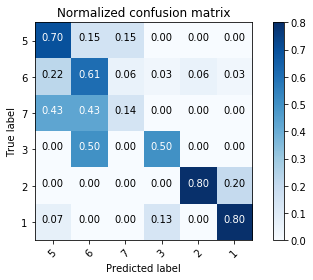

              precision    recall  f1-score   support

           5       0.63      0.57      0.60        30
           6       0.65      0.75      0.70        40
           7       0.38      0.30      0.33        10
           3       0.80      0.44      0.57         9
           2       0.43      0.75      0.55         4
           1       0.79      0.79      0.79        14

   micro avg       0.64      0.64      0.64       107
   macro avg       0.61      0.60      0.59       107
weighted avg       0.64      0.64      0.63       107

accuracy:  0.6355140186915887


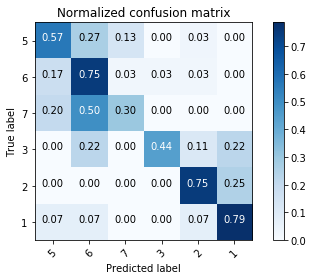

              precision    recall  f1-score   support

           5       0.76      0.76      0.76        37
           6       0.68      0.58      0.63        36
           7       0.21      0.43      0.29         7
           3       0.50      0.14      0.22         7
           2       0.29      0.67      0.40         3
           1       0.75      0.71      0.73        17

   micro avg       0.63      0.63      0.63       107
   macro avg       0.53      0.55      0.50       107
weighted avg       0.66      0.63      0.63       107

accuracy:  0.6261682242990654


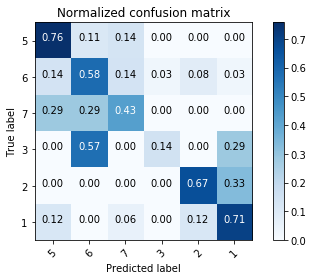

              precision    recall  f1-score   support

           5       0.61      0.67      0.64        33
           6       0.60      0.65      0.63        40
           7       0.33      0.20      0.25        10
           3       1.00      0.50      0.67         6
           2       0.50      0.17      0.25         6
           1       0.65      0.92      0.76        12

   micro avg       0.61      0.61      0.61       107
   macro avg       0.62      0.52      0.53       107
weighted avg       0.60      0.61      0.59       107

accuracy:  0.6074766355140186


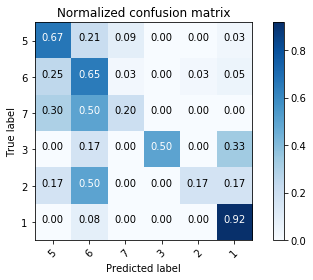

              precision    recall  f1-score   support

           5       0.60      0.77      0.68        31
           6       0.61      0.45      0.52        38
           7       0.20      0.22      0.21         9
           3       0.60      0.50      0.55         6
           2       0.60      0.60      0.60         5
           1       0.74      0.78      0.76        18

   micro avg       0.59      0.59      0.59       107
   macro avg       0.56      0.55      0.55       107
weighted avg       0.59      0.59      0.58       107

accuracy:  0.5887850467289719


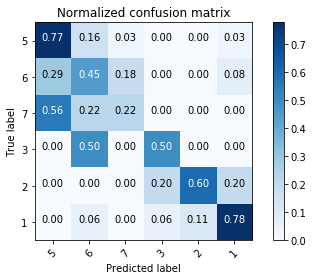

              precision    recall  f1-score   support

           5       0.69      0.64      0.67        39
           6       0.59      0.58      0.59        38
           7       0.36      0.50      0.42         8
           3       0.57      0.57      0.57         7
           2       0.43      0.75      0.55         4
           1       0.89      0.73      0.80        11

   micro avg       0.62      0.62      0.62       107
   macro avg       0.59      0.63      0.60       107
weighted avg       0.64      0.62      0.62       107

accuracy:  0.616822429906542


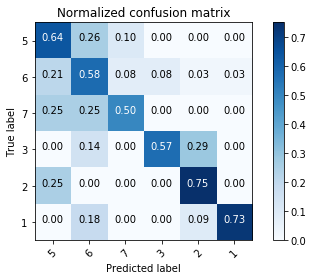

              precision    recall  f1-score   support

           5       0.66      0.62      0.64        40
           6       0.55      0.47      0.51        38
           7       0.20      0.40      0.27         5
           3       0.50      0.67      0.57         6
           2       0.50      0.75      0.60         4
           1       0.83      0.71      0.77        14

   micro avg       0.58      0.58      0.58       107
   macro avg       0.54      0.60      0.56       107
weighted avg       0.60      0.58      0.59       107

accuracy:  0.5794392523364486


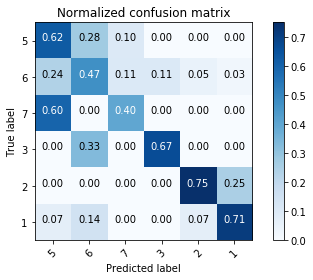

              precision    recall  f1-score   support

           5       0.59      0.87      0.70        30
           6       0.79      0.50      0.61        38
           7       0.44      0.33      0.38        12
           3       1.00      0.71      0.83         7
           2       0.45      1.00      0.62         5
           1       0.86      0.80      0.83        15

   micro avg       0.66      0.66      0.66       107
   macro avg       0.69      0.70      0.66       107
weighted avg       0.70      0.66      0.66       107

accuracy:  0.6635514018691588


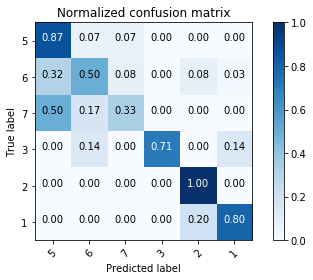

In [15]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(Glass):
        X_train, X_test = data_Glass.iloc[train_index], data_Glass.iloc[test_index]
        y_train, y_test = labels_Glass[train_index], labels_Glass[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = DecisionTreeClassifier()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        acc.append(accuracy_score(y_test, predicted))
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [16]:
with open("accDTWith10Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)